## Observations and Insights 

In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

merged = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
merged["Mouse ID"].nunique()

249

In [4]:
dupes = study_results.loc[study_results.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dupes

array(['g989'], dtype=object)

In [5]:
dupedf = merged.set_index("Mouse ID")
dupedata = dupedf.loc[dupes]
dupedata

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [6]:
cleanmerge = merged[merged["Mouse ID"].isin(dupes)==False]
cleanmerge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
cleanmerge["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
import numpy as np
grouped = cleanmerge.groupby(["Drug Regimen"])
rmean = grouped["Tumor Volume (mm3)"].mean()
rmed = grouped["Tumor Volume (mm3)"].median()
rvar = grouped["Tumor Volume (mm3)"].var()
rstd = grouped["Tumor Volume (mm3)"].std()
rsem = grouped["Tumor Volume (mm3)"].sem()
sumstats = pd.DataFrame({"Mean": rmean, "Median": rmed, "Variance": rvar, "Standard Deviation": rstd, "Standard Error": rsem})
sumstats


,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
summstats = cleanmerge.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
summstats


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

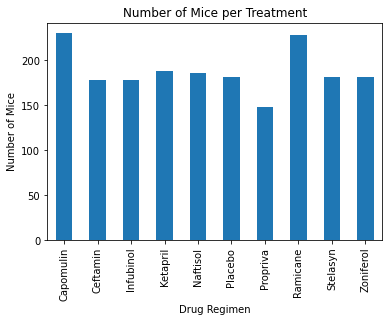

In [11]:
regimencount = cleanmerge.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimencount.plot(kind="bar")
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

<BarContainer object of 10 artists>

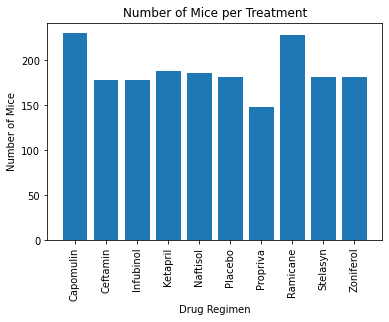

In [14]:
yax = cleanmerge.groupby(["Drug Regimen"]).count()["Mouse ID"]
xax = np.arange(len(cleanmerge.groupby(["Drug Regimen"]).count()))
ticks = [value for value in xax]
plt.xticks(ticks, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation=90)
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.bar(xax, yax)


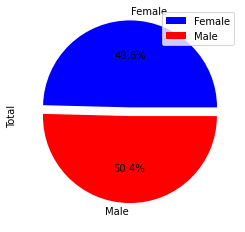

In [41]:
mfcount = cleanmerge.groupby(["Mouse ID", "Sex"])
mfcount
mf = pd.DataFrame(mfcount.size())
gender = pd.DataFrame(mf.groupby(["Sex"]).count())
gender.columns = ["Total"]
gender["Percentage"] = ((gender["Total"]/gender["Total"].sum()) * 100)
gender
color = ["b", "r"]
explode = (0.1, 0)
pie = gender.plot.pie(y="Total", colors = color, startangle=0, explode= explode, autopct="%1.1f%%")

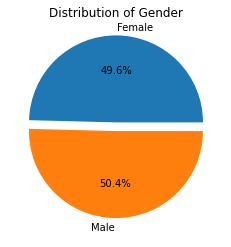

In [39]:
gender
plt.pie(gender["Percentage"], explode= explode, labels= ["Female", "Male"], autopct="%1.1f%%")
plt.title("Distribution of Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [50]:
four = cleanmerge[cleanmerge["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
four = four.sort_values(["Timepoint"], ascending=True)
four
fourclean = four[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
fourclean

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


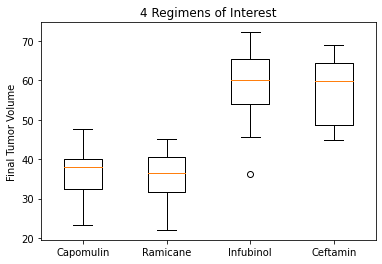

In [54]:
foursort = fourclean.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]
foursorted = foursort.to_frame()
reg = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
fourf = foursorted.reset_index()
tumor = fourf.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
tdf = pd.DataFrame(tumor)
tdf = tdf.reindex(reg)
tvol = [vol for vol in tdf["Tumor Volume (mm3)"]]
plt.boxplot(tvol, labels=reg)
plt.title("4 Regimens of Interest")
plt.ylabel("Final Tumor Volume")
plt.show()

## Line and Scatter Plots

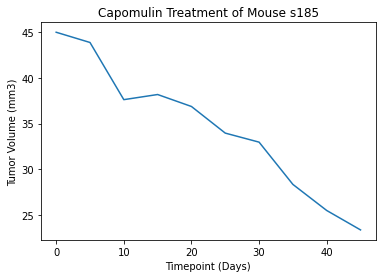

In [63]:
singmouse = cleanmerge[cleanmerge["Mouse ID"].isin(["s185"])]
mdata = singmouse[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
xax = mdata["Timepoint"]
yax = mdata["Tumor Volume (mm3)"]
plt.plot(xax, yax)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")
plt.show()

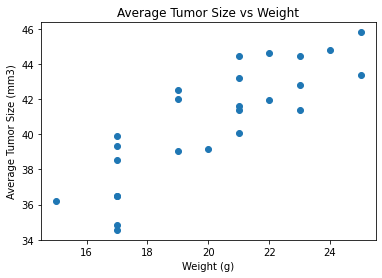

In [73]:
cap = cleanmerge[cleanmerge["Drug Regimen"].isin(["Capomulin"])]
caps = cap.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capw = cap.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(capw, caps)
plt.title("Average Tumor Size vs Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Size (mm3)")
plt.show()

## Correlation and Regression

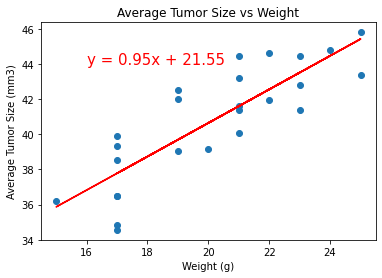

In [75]:
from scipy.stats import linregress
cap = cleanmerge[cleanmerge["Drug Regimen"].isin(["Capomulin"])]
caps = cap.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capw = cap.groupby("Mouse ID")["Weight (g)"].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(capw, caps)
regress_values = capw * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(capw, regress_values, "r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.scatter(capw, caps)
plt.title("Average Tumor Size vs Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Size (mm3)")
plt.show()